In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

root_path = 'drive/MyDrive/NBA-predictions'

Mounted at /content/drive


In [ ]:
# our data consists of all regular season games from 2013 to the end of the 2015 season
# DEPRECATED all_games = pd.read_csv(root_path +'/data/nba_games_2013_2015.csv', sep=';')
all_games = pd.read_csv(root_path +'/data/2013_ppdf.csv')

In [ ]:
all_games

,GAME_DATE,GAME_ID,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PREV_SEAS_WIN_PERC,HOME_PREV_SEAS_AVG_PTS_PER_GAME,HOME_PREV_SEAS_FG_PERC,HOME_PREV_SEAS_THREE_PERC,HOME_PREV_SEAS_FREE_THROW_PERC,HOME_PREV_SEAS_PLUS_MINUS,AWAY_PREV_SEAS_WIN_PERC,AWAY_PREV_SEAS_AVG_PTS_PER_GAME,AWAY_PREV_SEAS_FG_PERC,AWAY_PREV_SEAS_THREE_PERC,AWAY_PREV_SEAS_FREE_THROW_PERC,AWAY_PREV_SEAS_PLUS_MINUS,HOME_WIN
0,10/29/2013,21300001,ORL @ IND,IND,ORL,0.605,94.7,43.6,34.7,74.6,4.0,0.244,94.1,44.8,32.9,75.5,-7.0,1
1,10/29/2013,21300003,LAC @ LAL,LAL,LAC,0.549,102.2,45.8,35.5,69.2,1.2,0.683,101.1,47.8,35.8,71.1,6.5,1
2,10/29/2013,21300002,CHI @ MIA,MIA,CHI,0.805,102.9,49.6,39.6,75.4,7.9,0.549,93.2,43.7,35.3,77.3,0.3,1
3,10/30/2013,21300015,POR @ PHX,PHX,POR,0.305,95.2,44.3,33.0,74.4,-6.5,0.402,97.5,44.8,35.3,77.6,-3.2,1
4,10/30/2013,21300016,DEN @ SAC,SAC,DEN,0.341,100.2,44.7,36.3,76.9,-4.9,0.695,106.1,47.8,34.3,70.1,5.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,4/16/2014,21301220,DET @ OKC,OKC,DET,0.732,105.7,48.1,37.7,82.8,9.2,0.354,94.9,44.9,35.6,69.9,-4.0,1
1226,4/16/2014,21301229,PHX @ SAC,SAC,PHX,0.341,100.2,44.7,36.3,76.9,-4.9,0.305,95.2,44.3,33.0,74.4,-6.5,0
1227,4/16/2014,21301217,ATL @ MIL,MIL,ATL,0.463,98.9,43.5,36.0,73.6,-1.5,0.537,98.0,46.4,37.1,71.5,0.4,0
1228,4/16/2014,21301228,LAC @ POR,POR,LAC,0.402,97.5,44.8,35.3,77.6,-3.2,0.683,101.1,47.8,35.8,71.1,6.5,1


In [ ]:
all_games = all_games.sort_values(by=['GAME_DATE'])

In [ ]:
def get_season_by_year(year=2013, df=all_games):
  '''
  year = int
    NOTE: year = 2013, 2014, 2015 (due to dataset limitations)

  df = all_games by default

  Returns dataframe with games filtered by year.
  '''
  # Note: This function should be cleaned up to allow for more dynamic input
  # This is a quick implementation

  temp_df = df.copy()
  
  # pandas allows us to use strings to filter datetimes
  # we will use August 8th as the month and day to filter by season
  min_date = str(year) + '-08-08'
  max_date = str(year+1) + '-08-08'

  temp_df = temp_df.drop(temp_df[temp_df.GAME_DATE > max_date].index)
  temp_df = temp_df.drop(temp_df[temp_df.GAME_DATE < min_date].index)
  
  return temp_df

In [ ]:
def plot_confidence(y_test, y_preds, y_probs, bins=30, graph_range=(-1,0)):
  '''
  Plots predict_proba as a histogram.

  Note: The prediction probability is for HOME_WIN = 1, therefore the ideal graph would have most of its data centered around 40-60%.
    a 20% incorrect prediction for the HOME_WIN = 1 (when it should be 0) is the same magnitude of error as an 80% for predicting HOME_WIN = 0 (when it should be 1)

  '''
  import seaborn as sns
  import matplotlib.pyplot as plt
  sns.set(rc={'figure.figsize':(20, 8)})

  hist_data = pd.DataFrame()
  hist_data['TRUTH'] = y_test
  hist_data['PROBS'] = y_probs
  hist_data['PREDS'] = y_preds

  graph_col = list()
  for row in range(len(hist_data)):
    if hist_data.iloc[row].TRUTH == hist_data.iloc[row].PREDS: # the TRUTH matches the PREDICTION, append a POSITIVE PROBS
      graph_col.append(hist_data.iloc[row].PROBS)
    else:
      graph_col.append(hist_data.iloc[row].PROBS * (-1)) # the TRUTH does NOT match the PREDICTION, append a NEGATIVE PROBS

  hist_data['GRAPH'] = graph_col

  plt.hist([hist_data['GRAPH']], color=['blue'], bins=bins, range=graph_range)

  df_filter = hist_data.GRAPH < 0
  print('Mean confidence of error: ' + str(hist_data[df_filter]['GRAPH'].mean()))
  total_incorrect = hist_data[df_filter]['GRAPH'].count()

  df_filter = (hist_data.GRAPH < (-0.65)) | ((hist_data.GRAPH > (-0.35)) & (hist_data.GRAPH < (0)))
  print('Number of "strongly" incorrect (greater than 65% probability): ' + str(hist_data[df_filter]['GRAPH'].count()) + ' of ' + str(total_incorrect) + ' total incorrect.')
  
  return

In [ ]:
# create a working copy
df = all_games.copy()

In [ ]:
df = df.sort_values(by='GAME_ID')
df

,GAME_DATE,GAME_ID,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PREV_SEAS_WIN_PERC,HOME_PREV_SEAS_AVG_PTS_PER_GAME,HOME_PREV_SEAS_FG_PERC,HOME_PREV_SEAS_THREE_PERC,HOME_PREV_SEAS_FREE_THROW_PERC,HOME_PREV_SEAS_PLUS_MINUS,AWAY_PREV_SEAS_WIN_PERC,AWAY_PREV_SEAS_AVG_PTS_PER_GAME,AWAY_PREV_SEAS_FG_PERC,AWAY_PREV_SEAS_THREE_PERC,AWAY_PREV_SEAS_FREE_THROW_PERC,AWAY_PREV_SEAS_PLUS_MINUS,HOME_WIN
0,10/29/2013,21300001,ORL @ IND,IND,ORL,0.605,94.7,43.6,34.7,74.6,4.0,0.244,94.1,44.8,32.9,75.5,-7.0,1
2,10/29/2013,21300002,CHI @ MIA,MIA,CHI,0.805,102.9,49.6,39.6,75.4,7.9,0.549,93.2,43.7,35.3,77.3,0.3,1
1,10/29/2013,21300003,LAC @ LAL,LAL,LAC,0.549,102.2,45.8,35.5,69.2,1.2,0.683,101.1,47.8,35.8,71.1,6.5,1
5,10/30/2013,21300004,BKN @ CLE,CLE,BKN,0.293,96.5,43.4,34.6,75.6,-4.7,0.598,96.9,45.0,35.7,73.1,1.8,1
13,10/30/2013,21300005,MIA @ PHI,PHI,MIA,0.415,93.2,44.4,36.0,72.9,-3.3,0.805,102.9,49.6,39.6,75.4,7.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,4/16/2014,21301226,TOR @ NYK,NYK,TOR,0.659,100.0,44.8,37.6,75.9,4.2,0.415,97.2,44.6,34.3,78.8,-1.5,1
1220,4/16/2014,21301227,IND @ ORL,ORL,IND,0.244,94.1,44.8,32.9,75.5,-7.0,0.605,94.7,43.6,34.7,74.6,4.0,0
1228,4/16/2014,21301228,LAC @ POR,POR,LAC,0.402,97.5,44.8,35.3,77.6,-3.2,0.683,101.1,47.8,35.8,71.1,6.5,1
1226,4/16/2014,21301229,PHX @ SAC,SAC,PHX,0.341,100.2,44.7,36.3,76.9,-4.9,0.305,95.2,44.3,33.0,74.4,-6.5,0


In [ ]:
# DEPRECATED def filter_by_gameid(df, gameid):
#   df_filter = df['GAME_ID'] == gameid
#   return df[df_filter]

# test = filter_by_gameid(df, 21300001)
# test

In [ ]:
# DEPRECATED def filter_by_teamid(df, teamid):
#   df_filter = df['TEAM_ID'] == teamid
#   return df[df_filter]

# test = filter_by_teamid(df, 1610612754)
# test

In [ ]:
# # CREATE OPPONENT TEAM
# DEPRECATED OPPONENT_TEAMS = list()
# for i in range(len(df)):
#   #print(df.iloc[i].MATCHUP[-3:])
#   OPPONENT_TEAMS.append('OPP_' + str(df.iloc[i].MATCHUP[-3:]))

# df['OPPONENT_TEAM'] = OPPONENT_TEAMS

In [ ]:
# DEPRECATED win_loss_dict = {
#     'W' : 1,
#     'L' : 0
# }

# df['WL'] = df['WL'].replace(win_loss_dict)

In [ ]:
df

,GAME_DATE,GAME_ID,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PREV_SEAS_WIN_PERC,HOME_PREV_SEAS_AVG_PTS_PER_GAME,HOME_PREV_SEAS_FG_PERC,HOME_PREV_SEAS_THREE_PERC,HOME_PREV_SEAS_FREE_THROW_PERC,HOME_PREV_SEAS_PLUS_MINUS,AWAY_PREV_SEAS_WIN_PERC,AWAY_PREV_SEAS_AVG_PTS_PER_GAME,AWAY_PREV_SEAS_FG_PERC,AWAY_PREV_SEAS_THREE_PERC,AWAY_PREV_SEAS_FREE_THROW_PERC,AWAY_PREV_SEAS_PLUS_MINUS,HOME_WIN
0,10/29/2013,21300001,ORL @ IND,IND,ORL,0.605,94.7,43.6,34.7,74.6,4.0,0.244,94.1,44.8,32.9,75.5,-7.0,1
2,10/29/2013,21300002,CHI @ MIA,MIA,CHI,0.805,102.9,49.6,39.6,75.4,7.9,0.549,93.2,43.7,35.3,77.3,0.3,1
1,10/29/2013,21300003,LAC @ LAL,LAL,LAC,0.549,102.2,45.8,35.5,69.2,1.2,0.683,101.1,47.8,35.8,71.1,6.5,1
5,10/30/2013,21300004,BKN @ CLE,CLE,BKN,0.293,96.5,43.4,34.6,75.6,-4.7,0.598,96.9,45.0,35.7,73.1,1.8,1
13,10/30/2013,21300005,MIA @ PHI,PHI,MIA,0.415,93.2,44.4,36.0,72.9,-3.3,0.805,102.9,49.6,39.6,75.4,7.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,4/16/2014,21301226,TOR @ NYK,NYK,TOR,0.659,100.0,44.8,37.6,75.9,4.2,0.415,97.2,44.6,34.3,78.8,-1.5,1
1220,4/16/2014,21301227,IND @ ORL,ORL,IND,0.244,94.1,44.8,32.9,75.5,-7.0,0.605,94.7,43.6,34.7,74.6,4.0,0
1228,4/16/2014,21301228,LAC @ POR,POR,LAC,0.402,97.5,44.8,35.3,77.6,-3.2,0.683,101.1,47.8,35.8,71.1,6.5,1
1226,4/16/2014,21301229,PHX @ SAC,SAC,PHX,0.341,100.2,44.7,36.3,76.9,-4.9,0.305,95.2,44.3,33.0,74.4,-6.5,0


In [ ]:
TEAM_ABREV = pd.get_dummies(df.HOME_TEAM)
OPPONENT_ABBREV = pd.get_dummies(df.AWAY_TEAM)

df_baseline = pd.concat((
    df['GAME_DATE'],
    TEAM_ABREV, 
    OPPONENT_ABBREV, 
    df['HOME_WIN'] # target variable
), axis=1)

In [ ]:
df_baseline

,GAME_DATE,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS,HOME_WIN
0,10/29/2013,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,10/29/2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,10/29/2013,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,10/30/2013,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13,10/30/2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,4/16/2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1220,4/16/2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1228,4/16/2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1226,4/16/2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_13 = df_baseline.copy()
# DEPRECATED df_13 = df_13.drop(df_13[df_13.GAME_DATE > '2014-08-01'].index)

# df_14 = df_baseline.copy()
# df_14 = df_14.drop(df_14[df_14.GAME_DATE > '2015-08-01'].index)
# df_14 = df_14.drop(df_14[df_14.GAME_DATE < '2014-08-01'].index)

In [ ]:
df_13 = df_13.drop(columns=['GAME_DATE'])
# df_14 = df_14.drop(columns=['GAME_DATE'])

## Logistic Regression Model 1: 
# BASELINE
## Input Data:


1.   TEAM_1_ABBREVIATION (i.e. "MIA" for Miami Heat)
2.   TEAM_2_ABBREVIATION (i.e. "SAS" for San Antonio Spurs)

## Output Data:

1.   HOME_WIN (1 : YES, 0 : NO)




In [ ]:
from sklearn.model_selection import train_test_split
X_train_13, X_test_13, y_train_13, y_test_13 = train_test_split(df_13.drop(columns=['HOME_WIN']), df_13['HOME_WIN'], test_size=0.30, random_state=11)
# X_train_14, X_test_14, y_train_14, y_test_14 = train_test_split(df_14.drop(columns=['WL']), df_14['WL'], test_size=0.30, random_state=101)

In [ ]:
X_train_13.head()

,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
500,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
577,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1204,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_13.shape

(861, 60)

In [ ]:
from sklearn.linear_model import LogisticRegression

# simple logistic regression model used as a baseline classifier
clf_13 = LogisticRegression(random_state=101).fit(X_train_13, y_train_13)

In [ ]:
preds = clf_13.predict(X_test_13)
probs = clf_13.predict_proba(X_test_13)[:,1]

In [ ]:
clf_13.score(X_test_13, y_test_13)

0.6287262872628726

Mean confidence of error: -0.5356574189403326
Number of "strongly" incorrect (greater than 65% confidence): 63 of 137 total incorrect.


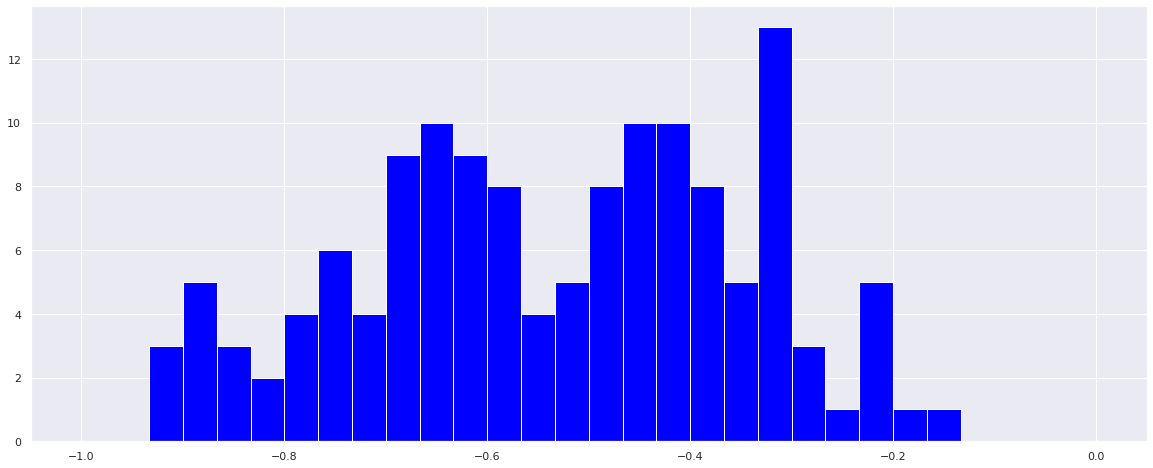

In [ ]:
plot_confidence(y_test_13, preds, probs)

In [ ]:
# # Attempting to predict the entire 2014 season - to see how lucky we are.
# DEPRECATED clf_13.score(df_14.drop(columns=['WL']), df_14['WL'])

In [ ]:
# This result makes sense because we're using our 2013 model to try and predict an entire year of results.

## Logistic Regression Model 2: 
# Historic Team Data

In [ ]:
# Let's revisit this with our updated database

df = pd.read_csv(root_path +'/data/2013_ppdf.csv')
df.head()

,GAME_DATE,GAME_ID,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PREV_SEAS_WIN_PERC,HOME_PREV_SEAS_AVG_PTS_PER_GAME,HOME_PREV_SEAS_FG_PERC,HOME_PREV_SEAS_THREE_PERC,HOME_PREV_SEAS_FREE_THROW_PERC,HOME_PREV_SEAS_PLUS_MINUS,AWAY_PREV_SEAS_WIN_PERC,AWAY_PREV_SEAS_AVG_PTS_PER_GAME,AWAY_PREV_SEAS_FG_PERC,AWAY_PREV_SEAS_THREE_PERC,AWAY_PREV_SEAS_FREE_THROW_PERC,AWAY_PREV_SEAS_PLUS_MINUS,HOME_WIN
0,10/29/2013,21300001,ORL @ IND,IND,ORL,0.605,94.7,43.6,34.7,74.6,4.0,0.244,94.1,44.8,32.9,75.5,-7.0,1
1,10/29/2013,21300003,LAC @ LAL,LAL,LAC,0.549,102.2,45.8,35.5,69.2,1.2,0.683,101.1,47.8,35.8,71.1,6.5,1
2,10/29/2013,21300002,CHI @ MIA,MIA,CHI,0.805,102.9,49.6,39.6,75.4,7.9,0.549,93.2,43.7,35.3,77.3,0.3,1
3,10/30/2013,21300015,POR @ PHX,PHX,POR,0.305,95.2,44.3,33.0,74.4,-6.5,0.402,97.5,44.8,35.3,77.6,-3.2,1
4,10/30/2013,21300016,DEN @ SAC,SAC,DEN,0.341,100.2,44.7,36.3,76.9,-4.9,0.695,106.1,47.8,34.3,70.1,5.1,1


In [ ]:
columns_list = df.columns.to_list()[5:]
columns_list
# columns_list = columns_list.remove('GAME_DATE')
# columns_list = columns_list.remove('MATCHUP')
# columns_list = columns_list.remove('MATCHUP')
# columns_list = columns_list.remove('MATCHUP')
# columns_list = columns_list.remove('MATCHUP')

['HOME_PREV_SEAS_WIN_PERC',
 'HOME_PREV_SEAS_AVG_PTS_PER_GAME',
 'HOME_PREV_SEAS_FG_PERC',
 'HOME_PREV_SEAS_THREE_PERC',
 'HOME_PREV_SEAS_FREE_THROW_PERC',
 'HOME_PREV_SEAS_PLUS_MINUS',
 'AWAY_PREV_SEAS_WIN_PERC',
 'AWAY_PREV_SEAS_AVG_PTS_PER_GAME',
 'AWAY_PREV_SEAS_FG_PERC',
 'AWAY_PREV_SEAS_THREE_PERC',
 'AWAY_PREV_SEAS_FREE_THROW_PERC',
 'AWAY_PREV_SEAS_PLUS_MINUS',
 'HOME_WIN']

In [ ]:
AWAY_TEAM_DICT = {
    'ATL' : 'AWAY_ATL',
    'BKN' : 'AWAY_BKN',
    'BOS' : 'AWAY_BOS', 
    'CHA' : 'AWAY_CHA', 
    'CHI' : 'AWAY_CHI', 
    'CLE' : 'AWAY_CLE', 
    'DAL' : 'AWAY_DAL', 
    'DEN' : 'AWAY_DEN', 
    'DET' : 'AWAY_DET', 
    'GSW' : 'AWAY_GSW', 
    'HOU' : 'AWAY_HOU', 
    'IND' : 'AWAY_IND', 
    'LAC' : 'AWAY_LAC', 
    'LAL' : 'AWAY_LAL', 
    'MEM' : 'AWAY_MEM', 
    'MIA' : 'AWAY_MIA', 
    'MIL' : 'AWAY_MIL', 
    'MIN' : 'AWAY_MIN', 
    'NOP' : 'AWAY_NOP', 
    'NYK' : 'AWAY_NYK', 
    'OKC' : 'AWAY_OKC', 
    'ORL' : 'AWAY_ORL', 
    'PHI' : 'AWAY_PHI', 
    'PHX' : 'AWAY_PHX', 
    'POR' : 'AWAY_POR', 
    'SAC' : 'AWAY_SAC', 
    'SAS' : 'AWAY_SAS', 
    'TOR' : 'AWAY_TOR', 
    'UTA' : 'AWAY_UTA', 
    'WAS' : 'AWAY_WAS',  
}
AWAY_TEAM = pd.get_dummies(df.AWAY_TEAM)
AWAY_TEAM = AWAY_TEAM.rename(columns=AWAY_TEAM_DICT)

HOME_TEAM = pd.get_dummies(df.HOME_TEAM)

df_model = pd.concat((
    HOME_TEAM, 
    AWAY_TEAM,
    df[columns_list]
), axis=1)


In [ ]:
df_model

,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS,AWAY_ATL,AWAY_BKN,AWAY_BOS,AWAY_CHA,AWAY_CHI,AWAY_CLE,AWAY_DAL,AWAY_DEN,AWAY_DET,AWAY_GSW,AWAY_HOU,AWAY_IND,AWAY_LAC,AWAY_LAL,AWAY_MEM,AWAY_MIA,AWAY_MIL,AWAY_MIN,AWAY_NOP,AWAY_NYK,AWAY_OKC,AWAY_ORL,AWAY_PHI,AWAY_PHX,AWAY_POR,AWAY_SAC,AWAY_SAS,AWAY_TOR,AWAY_UTA,AWAY_WAS,HOME_PREV_SEAS_WIN_PERC,HOME_PREV_SEAS_AVG_PTS_PER_GAME,HOME_PREV_SEAS_FG_PERC,HOME_PREV_SEAS_THREE_PERC,HOME_PREV_SEAS_FREE_THROW_PERC,HOME_PREV_SEAS_PLUS_MINUS,AWAY_PREV_SEAS_WIN_PERC,AWAY_PREV_SEAS_AVG_PTS_PER_GAME,AWAY_PREV_SEAS_FG_PERC,AWAY_PREV_SEAS_THREE_PERC,AWAY_PREV_SEAS_FREE_THROW_PERC,AWAY_PREV_SEAS_PLUS_MINUS,HOME_WIN
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.605,94.7,43.6,34.7,74.6,4.0,0.244,94.1,44.8,32.9,75.5,-7.0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.549,102.2,45.8,35.5,69.2,1.2,0.683,101.1,47.8,35.8,71.1,6.5,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.805,102.9,49.6,39.6,75.4,7.9,0.549,93.2,43.7,35.3,77.3,0.3,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.305,95.2,44.3,33.0,74.4,-6.5,0.402,97.5,44.8,35.3,77.6,-3.2,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.341,100.2,44.7,36.3,76.9,-4.9,0.695,106.1,47.8,34.3,70.1,5.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.732,105.7,48.1,37.7,82.8,9.2,0.354,94.9,44.9,35.6,69.9,-4.0,1
1226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.341,100.2,44.7,36.3,76.9,-4.9,0.305,95.2,44.3,33.0,74.4,-6.5,0
1227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.463,98.9,43.5,36.0,73.6,-1.5,0.537,98.0,46.4,37.1,71.5,0.4,0
1228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.402,97.5,44.8,35.3,77.6,-3.2,0.683,101.1,47.8,35.8,71.1,6.5,1


In [ ]:
X = df_model.drop(columns=['HOME_WIN'])
y = df_model['HOME_WIN']

In [ ]:
from sklearn import preprocessing
mms = preprocessing.MinMaxScaler()
temp_df = X.copy()
for i in temp_df.columns[60:]:
  #print(i)
  X[i] = mms.fit_transform(temp_df[i].values.reshape(-1,1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
X_train.head()

,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS,AWAY_ATL,AWAY_BKN,AWAY_BOS,AWAY_CHA,AWAY_CHI,AWAY_CLE,AWAY_DAL,AWAY_DEN,AWAY_DET,AWAY_GSW,AWAY_HOU,AWAY_IND,AWAY_LAC,AWAY_LAL,AWAY_MEM,AWAY_MIA,AWAY_MIL,AWAY_MIN,AWAY_NOP,AWAY_NYK,AWAY_OKC,AWAY_ORL,AWAY_PHI,AWAY_PHX,AWAY_POR,AWAY_SAC,AWAY_SAS,AWAY_TOR,AWAY_UTA,AWAY_WAS,HOME_PREV_SEAS_WIN_PERC,HOME_PREV_SEAS_AVG_PTS_PER_GAME,HOME_PREV_SEAS_FG_PERC,HOME_PREV_SEAS_THREE_PERC,HOME_PREV_SEAS_FREE_THROW_PERC,HOME_PREV_SEAS_PLUS_MINUS,AWAY_PREV_SEAS_WIN_PERC,AWAY_PREV_SEAS_AVG_PTS_PER_GAME,AWAY_PREV_SEAS_FG_PERC,AWAY_PREV_SEAS_THREE_PERC,AWAY_PREV_SEAS_FREE_THROW_PERC,AWAY_PREV_SEAS_PLUS_MINUS
231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000,0.069767,0.323944,0.244898,0.463235,0.119565,0.825312,0.759690,0.788732,0.724490,0.727941,0.847826
543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.456328,0.612403,0.521127,0.683673,0.742647,0.467391,0.151515,0.069767,0.323944,0.591837,0.617647,0.288043
1097,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,0.069767,0.323944,0.244898,0.463235,0.119565,0.304813,0.310078,0.295775,0.387755,0.705882,0.418478
961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.825312,0.759690,0.788732,0.724490,0.727941,0.847826,0.281640,0.333333,0.323944,0.489796,0.617647,0.326087
98,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.782531,0.612403,0.746479,0.540816,0.139706,0.853261,0.238859,0.193798,0.197183,0.000000,0.367647,0.369565


In [ ]:
# simple logistic regression model used as a baseline classifier
clf = LogisticRegression(random_state=101, max_iter=1000).fit(X_train, y_train)

In [ ]:
preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)[:,1]

In [ ]:
clf.score(X_test, y_test)

0.6287262872628726

Mean confidence of error: -0.5974994557795907
Number of "strongly" incorrect (greater than 65% confidence): 60 of 137 total incorrect.


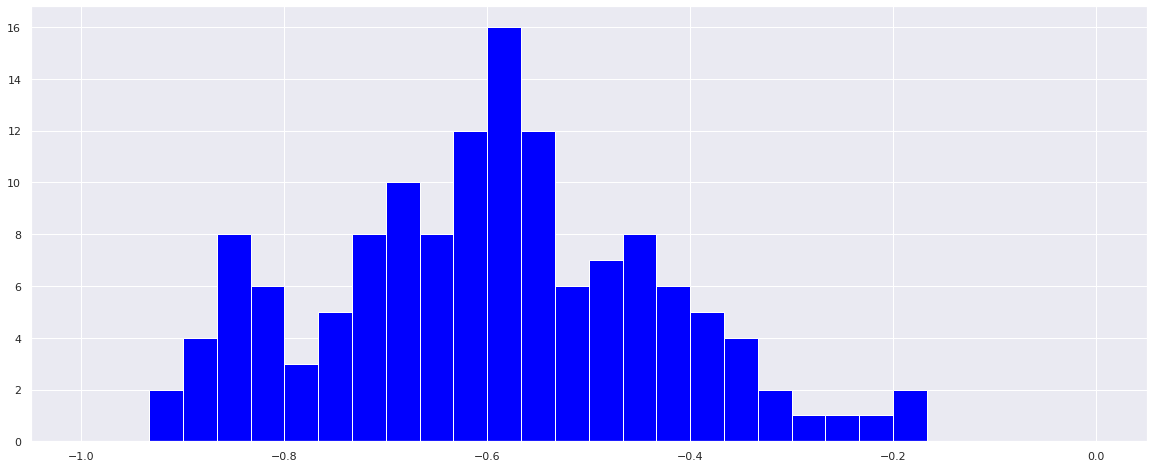

In [ ]:
plot_confidence(y_test, preds, probs)

## Logistic Regression Model 3: 
# Rolling Average

In [ ]:
all_games = pd.read_csv(root_path +'/data/all_games_ppmadf.csv')
all_games.GAME_DATE = pd.to_datetime(all_games.GAME_DATE)

df_2013 = get_season_by_year(2013, df=all_games)
df_2014 = get_season_by_year(2014, df=all_games)
df_2015 = get_season_by_year(2015, df=all_games)

In [ ]:
def create_training_data(df=all_games):
  '''
  Create a dataframe for training/testing using the df argument.

  Returns a DataFrame.
  '''

  AWAY_TEAM_DICT = {
      'ATL' : 'AWAY_ATL',
      'BKN' : 'AWAY_BKN',
      'BOS' : 'AWAY_BOS', 
      'CHA' : 'AWAY_CHA', 
      'CHI' : 'AWAY_CHI', 
      'CLE' : 'AWAY_CLE', 
      'DAL' : 'AWAY_DAL', 
      'DEN' : 'AWAY_DEN', 
      'DET' : 'AWAY_DET', 
      'GSW' : 'AWAY_GSW', 
      'HOU' : 'AWAY_HOU', 
      'IND' : 'AWAY_IND', 
      'LAC' : 'AWAY_LAC', 
      'LAL' : 'AWAY_LAL', 
      'MEM' : 'AWAY_MEM', 
      'MIA' : 'AWAY_MIA', 
      'MIL' : 'AWAY_MIL', 
      'MIN' : 'AWAY_MIN', 
      'NOP' : 'AWAY_NOP', 
      'NYK' : 'AWAY_NYK', 
      'OKC' : 'AWAY_OKC', 
      'ORL' : 'AWAY_ORL', 
      'PHI' : 'AWAY_PHI', 
      'PHX' : 'AWAY_PHX', 
      'POR' : 'AWAY_POR', 
      'SAC' : 'AWAY_SAC', 
      'SAS' : 'AWAY_SAS', 
      'TOR' : 'AWAY_TOR', 
      'UTA' : 'AWAY_UTA', 
      'WAS' : 'AWAY_WAS',  
  }
  AWAY_TEAM = pd.get_dummies(df.AWAY_TEAM)
  AWAY_TEAM = AWAY_TEAM.rename(columns=AWAY_TEAM_DICT)

  HOME_TEAM = pd.get_dummies(df.HOME_TEAM)

  df = df.drop(columns=[
                        'GAME_DATE',
                        'GAME_ID',
                        'MATCHUP',
                        'HOME_TEAM',
                        'AWAY_TEAM'
                        ])

  df_model = pd.concat((
      HOME_TEAM, 
      AWAY_TEAM,
      df
  ), axis=1)
  
  return df_model

In [ ]:
dft_2013 = create_training_data(df_2013)
dft_2014 = create_training_data(df_2014)
dft_2015 = create_training_data(df_2015)
df_all = create_training_data(all_games)

X_13 = dft_2013.drop(columns=['HOME_WIN'])
y_13 = dft_2013['HOME_WIN']

X_14 = dft_2014.drop(columns=['HOME_WIN'])
y_14 = dft_2014['HOME_WIN']

X_15 = dft_2015.drop(columns=['HOME_WIN'])
y_15 = dft_2015['HOME_WIN']

X_all = df_all.drop(columns=['HOME_WIN'])
y_all = df_all['HOME_WIN']

from sklearn import preprocessing
mms = preprocessing.MinMaxScaler()

# 2013 data
temp_df = X_13.copy()
for i in temp_df.columns[60:]:
  #print(i)
  X_13[i] = mms.fit_transform(temp_df[i].values.reshape(-1,1))

# 2014 data
temp_df = X_14.copy()
for i in temp_df.columns[60:]:
  #print(i)
  X_14[i] = mms.fit_transform(temp_df[i].values.reshape(-1,1))

# 2015 data
temp_df = X_15.copy()
for i in temp_df.columns[60:]:
  #print(i)
  X_15[i] = mms.fit_transform(temp_df[i].values.reshape(-1,1))

# 2013-2015
temp_df = X_all.copy()
for i in temp_df.columns[60:]:
  #print(i)
  X_all[i] = mms.fit_transform(temp_df[i].values.reshape(-1,1))


# merge 2 years for training
X_1314 = X_13.append(X_14)
y_1314 = y_13.append(y_14)


from sklearn.model_selection import train_test_split
test_size = 0.3
random_state = 101

X_train_13, X_test_13, y_train_13, y_test_13 = train_test_split(X_13, y_13, test_size=test_size, random_state=random_state)
X_train_14, X_test_14, y_train_14, y_test_14 = train_test_split(X_14, y_14, test_size=test_size, random_state=random_state)
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=test_size, random_state=random_state)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=test_size, random_state=random_state)

X_train_1314, X_test_1314, y_train_1314, y_test_1314 = train_test_split(X_1314, y_1314, test_size=test_size, random_state=random_state)


In [ ]:
from sklearn.linear_model import LogisticRegression
# simple logistic regression model used as a baseline classifier
clf_1314 = LogisticRegression(random_state=101, max_iter=1000).fit(X_train_1314, y_train_1314)

preds = clf_1314.predict(X_test_1314)
probs = clf_1314.predict_proba(X_test_1314)[:,1]
clf_1314.score(X_test_1314, y_test_1314)

0.6648122392211405

Mean confidence of error: -0.5068996809981365
Number of "strongly" incorrect (greater than 65% confidence): 109 of 241 total incorrect.


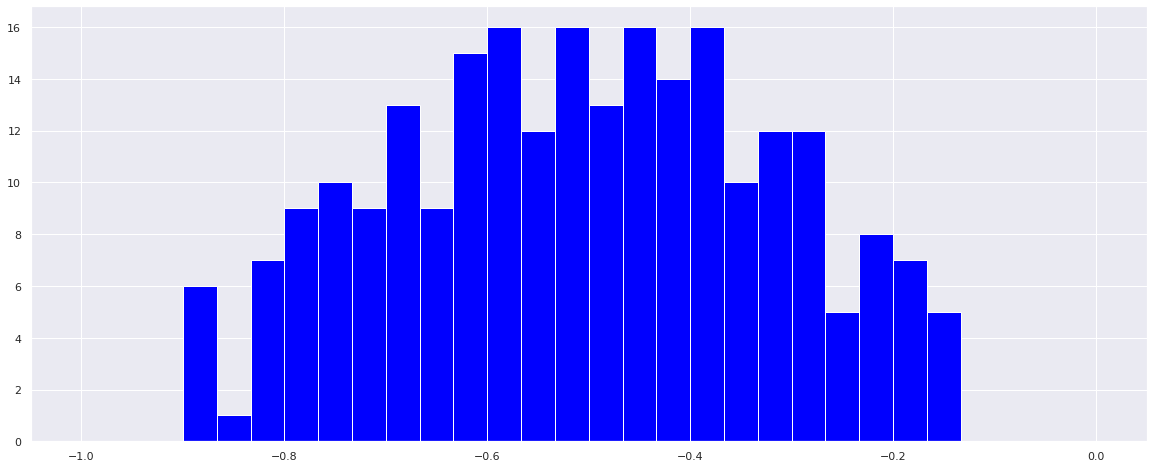

In [ ]:
plot_confidence(y_test_1314, preds, probs)

In [ ]:
clf_1314.score(X_train_15, y_train_15)

0.6283391405342624

Mean confidence of error: -0.49767176039935396
Number of "strongly" incorrect (greater than 65% confidence): 149 of 320 total incorrect.


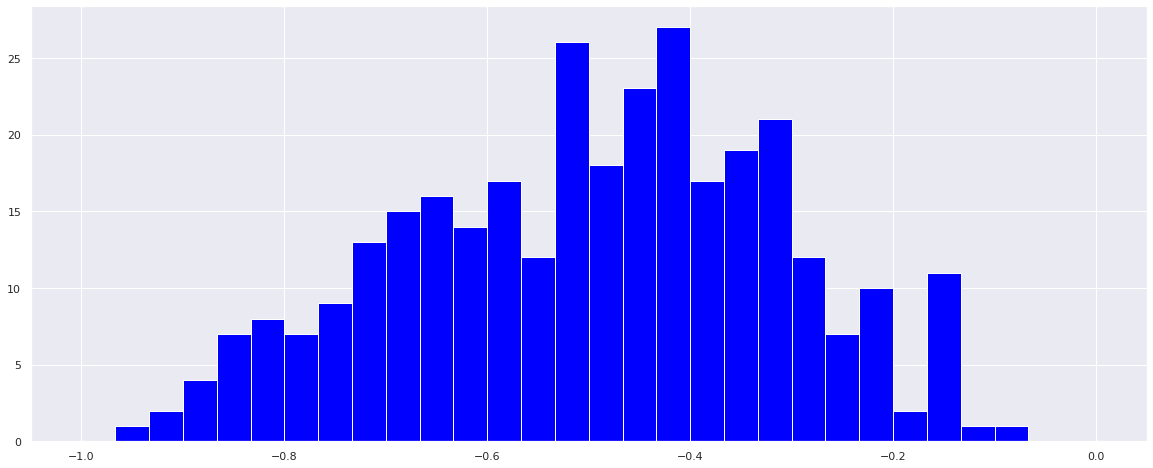

In [ ]:
preds = clf_1314.predict(X_train_15)
probs = clf_1314.predict_proba(X_train_15)[:,1]
plot_confidence(y_train_15, preds, probs)

In [ ]:
clf_all = LogisticRegression(random_state=101, max_iter=1000).fit(X_train_all, y_train_all)
clf_all.score(X_test_all, y_test_all)

0.6534926470588235

Mean confidence of error: -0.510999935176738
Number of "strongly" incorrect (greater than 65% confidence): 147 of 377 total incorrect.


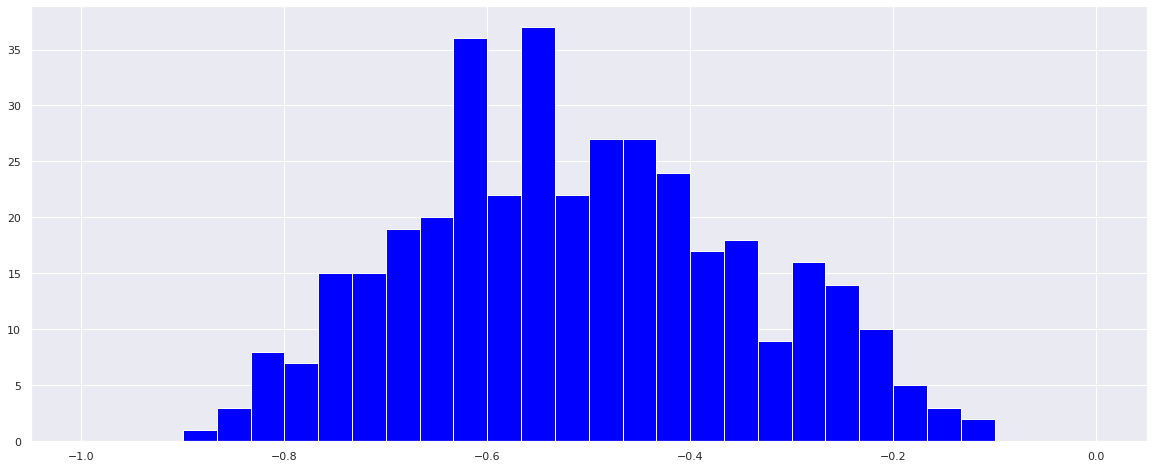

In [ ]:
preds = clf_all.predict(X_test_all)
probs = clf_all.predict_proba(X_test_all)[:,1]
plot_confidence(y_test_all, preds, probs)

In [ ]:
clf_1314 = LogisticRegression(random_state=101, max_iter=1000).fit(X_train_1314, y_train_1314)
clf_1314.score(X_test_1314, y_test_1314)

0.6648122392211405

Mean confidence of error: -0.5068996809981365
Number of "strongly" incorrect (greater than 65% confidence): 109 of 241 total incorrect.


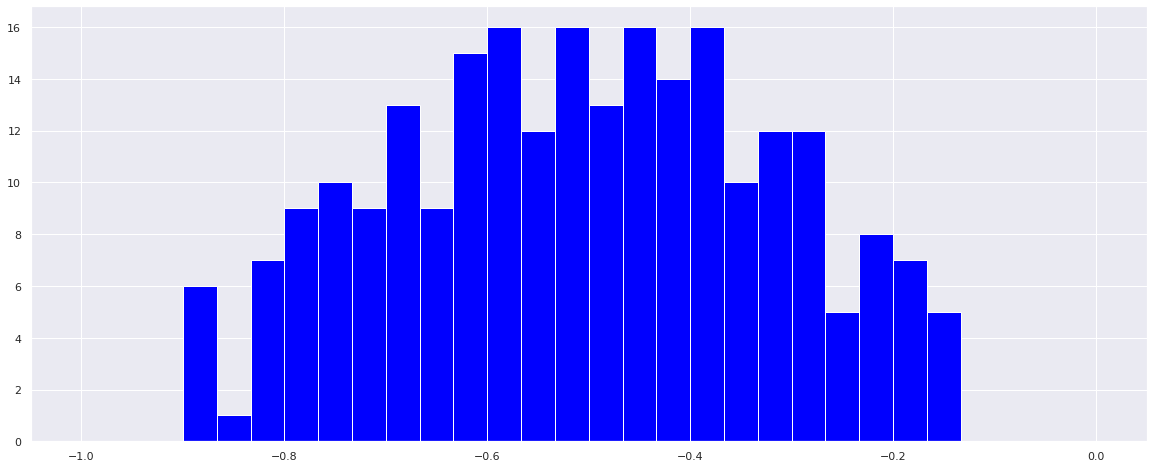

In [ ]:
preds = clf_1314.predict(X_test_1314)
probs = clf_1314.predict_proba(X_test_1314)[:,1]
plot_confidence(y_test_1314, preds, probs)

In [ ]:
preds = clf_1314.predict(X_train_15)
probs = clf_1314.predict_proba(X_train_15)[:,1]
clf_1314.score(X_train_15, y_train_15)

0.6283391405342624

Mean confidence of error: -0.49767176039935396
Number of "strongly" incorrect (greater than 65% confidence): 149 of 320 total incorrect.


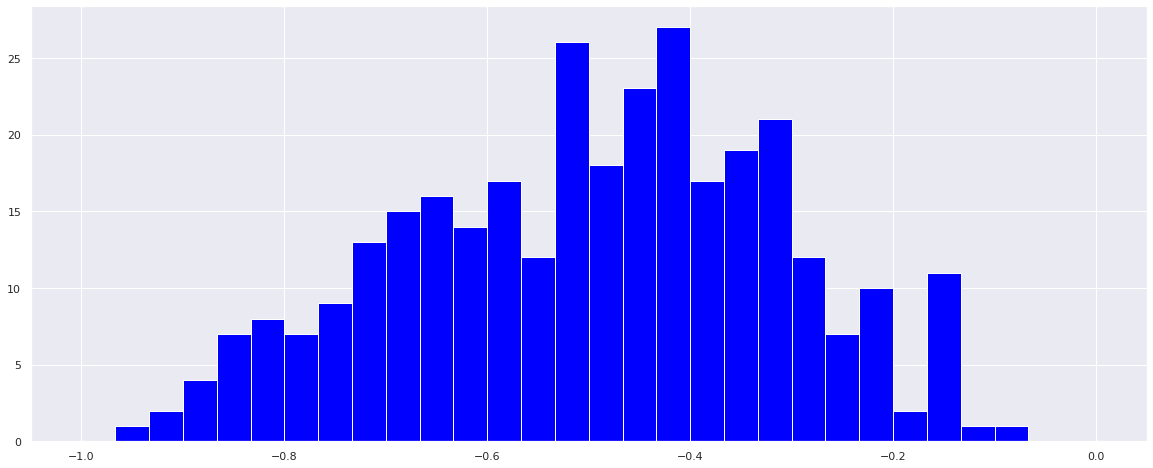

In [ ]:
plot_confidence(y_train_15, preds, probs)

## Logistic Regression Model 4: 
# 2013-2014 Training Data

In this section I address the possibility that the training data being scrambled may have been affecting the accuracy of the model (in either a good or bad way).

I have organized the training data to consist of all of the 2013-2014 matches. The test data consists of all of the 2015 season game matches.

I am still using the Rolling Average data.

In [ ]:
train_data = pd.read_csv(root_path +'/data/train_data_ppmadf.csv')
test_data= pd.read_csv(root_path +'/data/test_data_ppmadf.csv')

X_train = train_data.drop(columns=['HOME_WIN'])
y_train = train_data['HOME_WIN']

X_test = test_data.drop(columns=['HOME_WIN'])
y_test = test_data['HOME_WIN']

In [ ]:
# simple logistic regression model used as a baseline classifier
clf = LogisticRegression(random_state=101, max_iter=1000).fit(X_train, y_train)

0.6430894308943089
Mean confidence of error: -0.5038249168502376
Number of "strongly" incorrect (greater than 65% probability): 213 of 439 total incorrect.


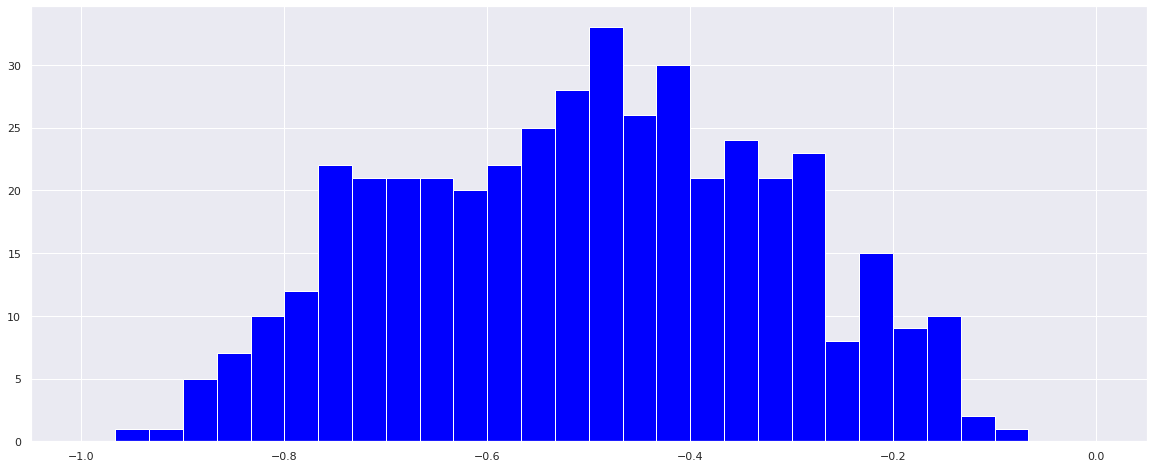

In [ ]:
preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)[:,1]
print(clf.score(X_test, y_test))
plot_confidence(y_test, preds, probs)